In [1]:
!gdown 1tMcy0cbqry52xuXjLqFkbJDRbJwpLVSo

Downloading...
From: https://drive.google.com/uc?id=1tMcy0cbqry52xuXjLqFkbJDRbJwpLVSo
To: /content/data.zip
100% 798k/798k [00:00<00:00, 85.8MB/s]


In [2]:
!unzip data.zip

Archive:  data.zip
  inflating: kc_house_data.csv       


In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
dataset.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
for val in dataset:
    print(f'For {val}, {dataset[val].nunique()} unique values present')

For id, 21436 unique values present
For date, 372 unique values present
For price, 4028 unique values present
For bedrooms, 13 unique values present
For bathrooms, 30 unique values present
For sqft_living, 1038 unique values present
For sqft_lot, 9782 unique values present
For floors, 6 unique values present
For waterfront, 2 unique values present
For view, 5 unique values present
For condition, 5 unique values present
For grade, 12 unique values present
For sqft_above, 946 unique values present
For sqft_basement, 306 unique values present
For yr_built, 116 unique values present
For yr_renovated, 70 unique values present
For zipcode, 70 unique values present
For lat, 5034 unique values present
For long, 752 unique values present
For sqft_living15, 777 unique values present
For sqft_lot15, 8689 unique values present


In [10]:
dataset = dataset.drop(['id', 'date'], axis=1)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Figure size 1000x600 with 0 Axes>

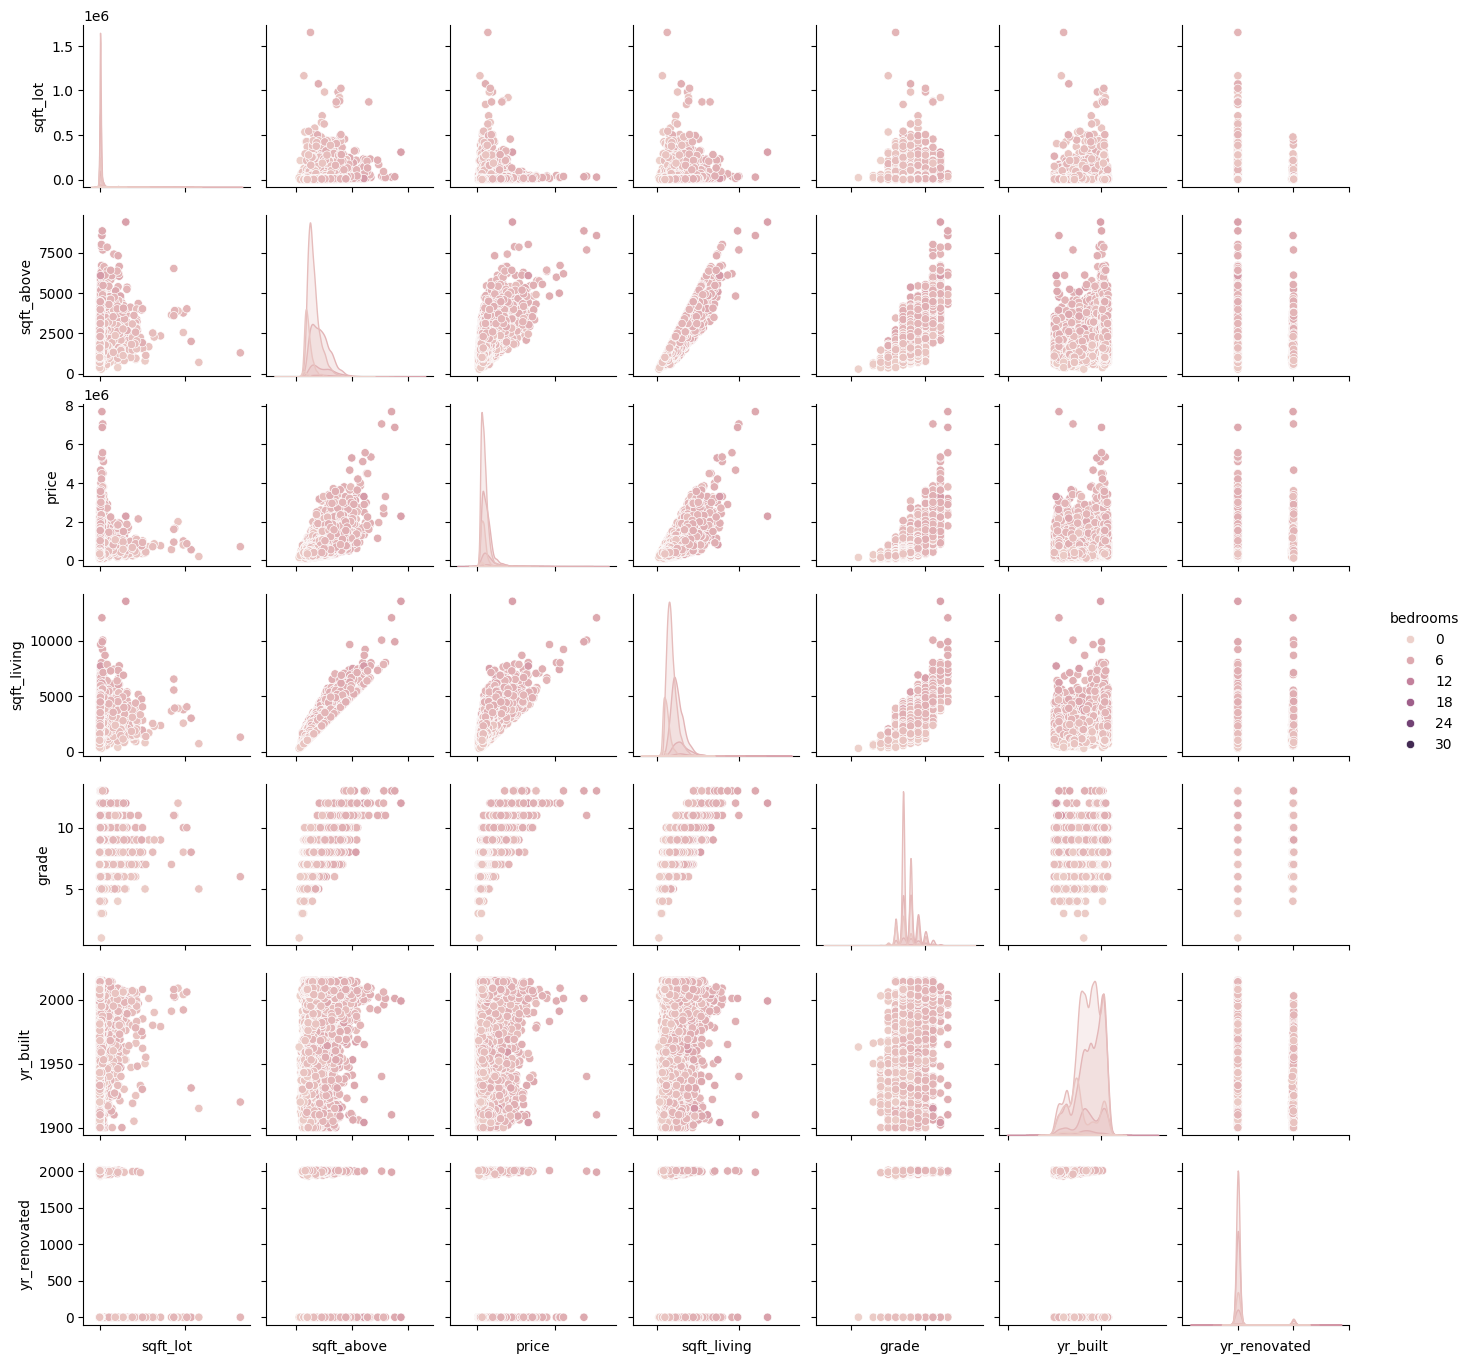

In [12]:
plt.figure(figsize=(10, 6))
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',height=2)
g.set(xticklabels=[])

<Axes: >

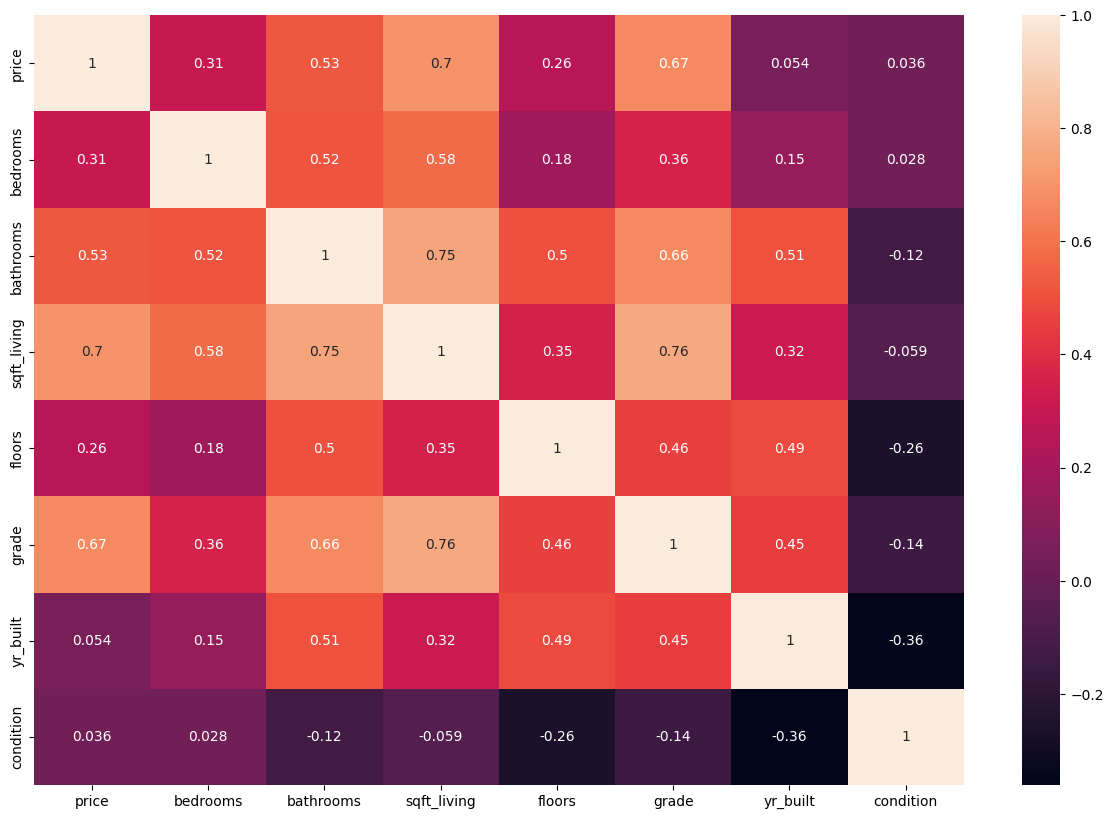

In [13]:
plt.figure(figsize=(15, 10))
cols = ['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[cols].corr(), annot=True)

In [14]:
corr_mat = dataset.corr()
price_corr = corr_mat['price'].sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [15]:
features = price_corr.index
threshold = 0.25
most_important_features = [
    feature for feature in features if price_corr[feature] > threshold
]
most_important_features

['price',
 'sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms',
 'lat',
 'waterfront',
 'floors']

# Data Splitting

In [17]:
col_not_exists = [col for col in dataset.columns if col not in most_important_features]
col_not_exists

['sqft_lot',
 'condition',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'long',
 'sqft_lot15']

In [18]:
dataset = dataset.drop(col_not_exists,axis=1)
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [21]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"X Train - {X_train}")
print(f"Y Train - {y_train}")
print(f"X Test - {X_test}")
print(f"Y Test - {X_train}")

X Train - [[4.00000e+00 1.50000e+00 1.39000e+03 ... 2.50000e+02 4.77224e+01
  1.63000e+03]
 [3.00000e+00 1.50000e+00 1.45000e+03 ... 0.00000e+00 4.77725e+01
  1.44000e+03]
 [5.00000e+00 2.75000e+00 2.86000e+03 ... 0.00000e+00 4.77082e+01
  2.98000e+03]
 ...
 [3.00000e+00 2.25000e+00 2.36000e+03 ... 0.00000e+00 4.73856e+01
  2.72000e+03]
 [4.00000e+00 2.00000e+00 2.37000e+03 ... 0.00000e+00 4.72831e+01
  2.11000e+03]
 [4.00000e+00 2.25000e+00 2.38000e+03 ... 8.40000e+02 4.76126e+01
  2.23000e+03]]
Y Train - [400000. 430000. 720000. ... 431000. 411000. 699900.]
X Test - [[2.00000e+00 1.50000e+00 1.43000e+03 ... 0.00000e+00 4.77222e+01
  1.43000e+03]
 [4.00000e+00 3.25000e+00 4.67000e+03 ... 0.00000e+00 4.76350e+01
  4.23000e+03]
 [2.00000e+00 7.50000e-01 1.44000e+03 ... 2.40000e+02 4.76707e+01
  1.44000e+03]
 ...
 [3.00000e+00 2.50000e+00 2.15000e+03 ... 0.00000e+00 4.74514e+01
  1.85000e+03]
 [3.00000e+00 1.75000e+00 1.48000e+03 ... 5.00000e+02 4.73657e+01
  1.79000e+03]
 [3.00000e+00 1

[Text(0.5341996173469388, 0.9444444444444444, 'x[6] <= 8.5\nsquared_error = 133697018052.424\nsamples = 15129\nvalue = 540606.716'),
 Text(0.28300382653061223, 0.8333333333333334, 'x[9] <= 47.533\nsquared_error = 39299730330.379\nsamples = 12179\nvalue = 439168.039'),
 Text(0.15066964285714285, 0.7222222222222222, 'x[2] <= 1933.0\nsquared_error = 14161275849.054\nsamples = 5025\nvalue = 314568.314'),
 Text(0.07876275510204081, 0.6111111111111112, 'x[2] <= 1442.0\nsquared_error = 6842991129.996\nsamples = 3145\nvalue = 268834.377'),
 Text(0.04081632653061224, 0.5, 'x[9] <= 47.511\nsquared_error = 6056411230.26\nsamples = 1633\nvalue = 242876.843'),
 Text(0.02040816326530612, 0.3888888888888889, 'x[5] <= 2.5\nsquared_error = 4617508993.89\nsamples = 1333\nvalue = 230759.074'),
 Text(0.01020408163265306, 0.2777777777777778, 'x[2] <= 1105.0\nsquared_error = 3791505223.893\nsamples = 1319\nvalue = 228272.551'),
 Text(0.00510204081632653, 0.16666666666666666, 'x[4] <= 0.5\nsquared_error = 36

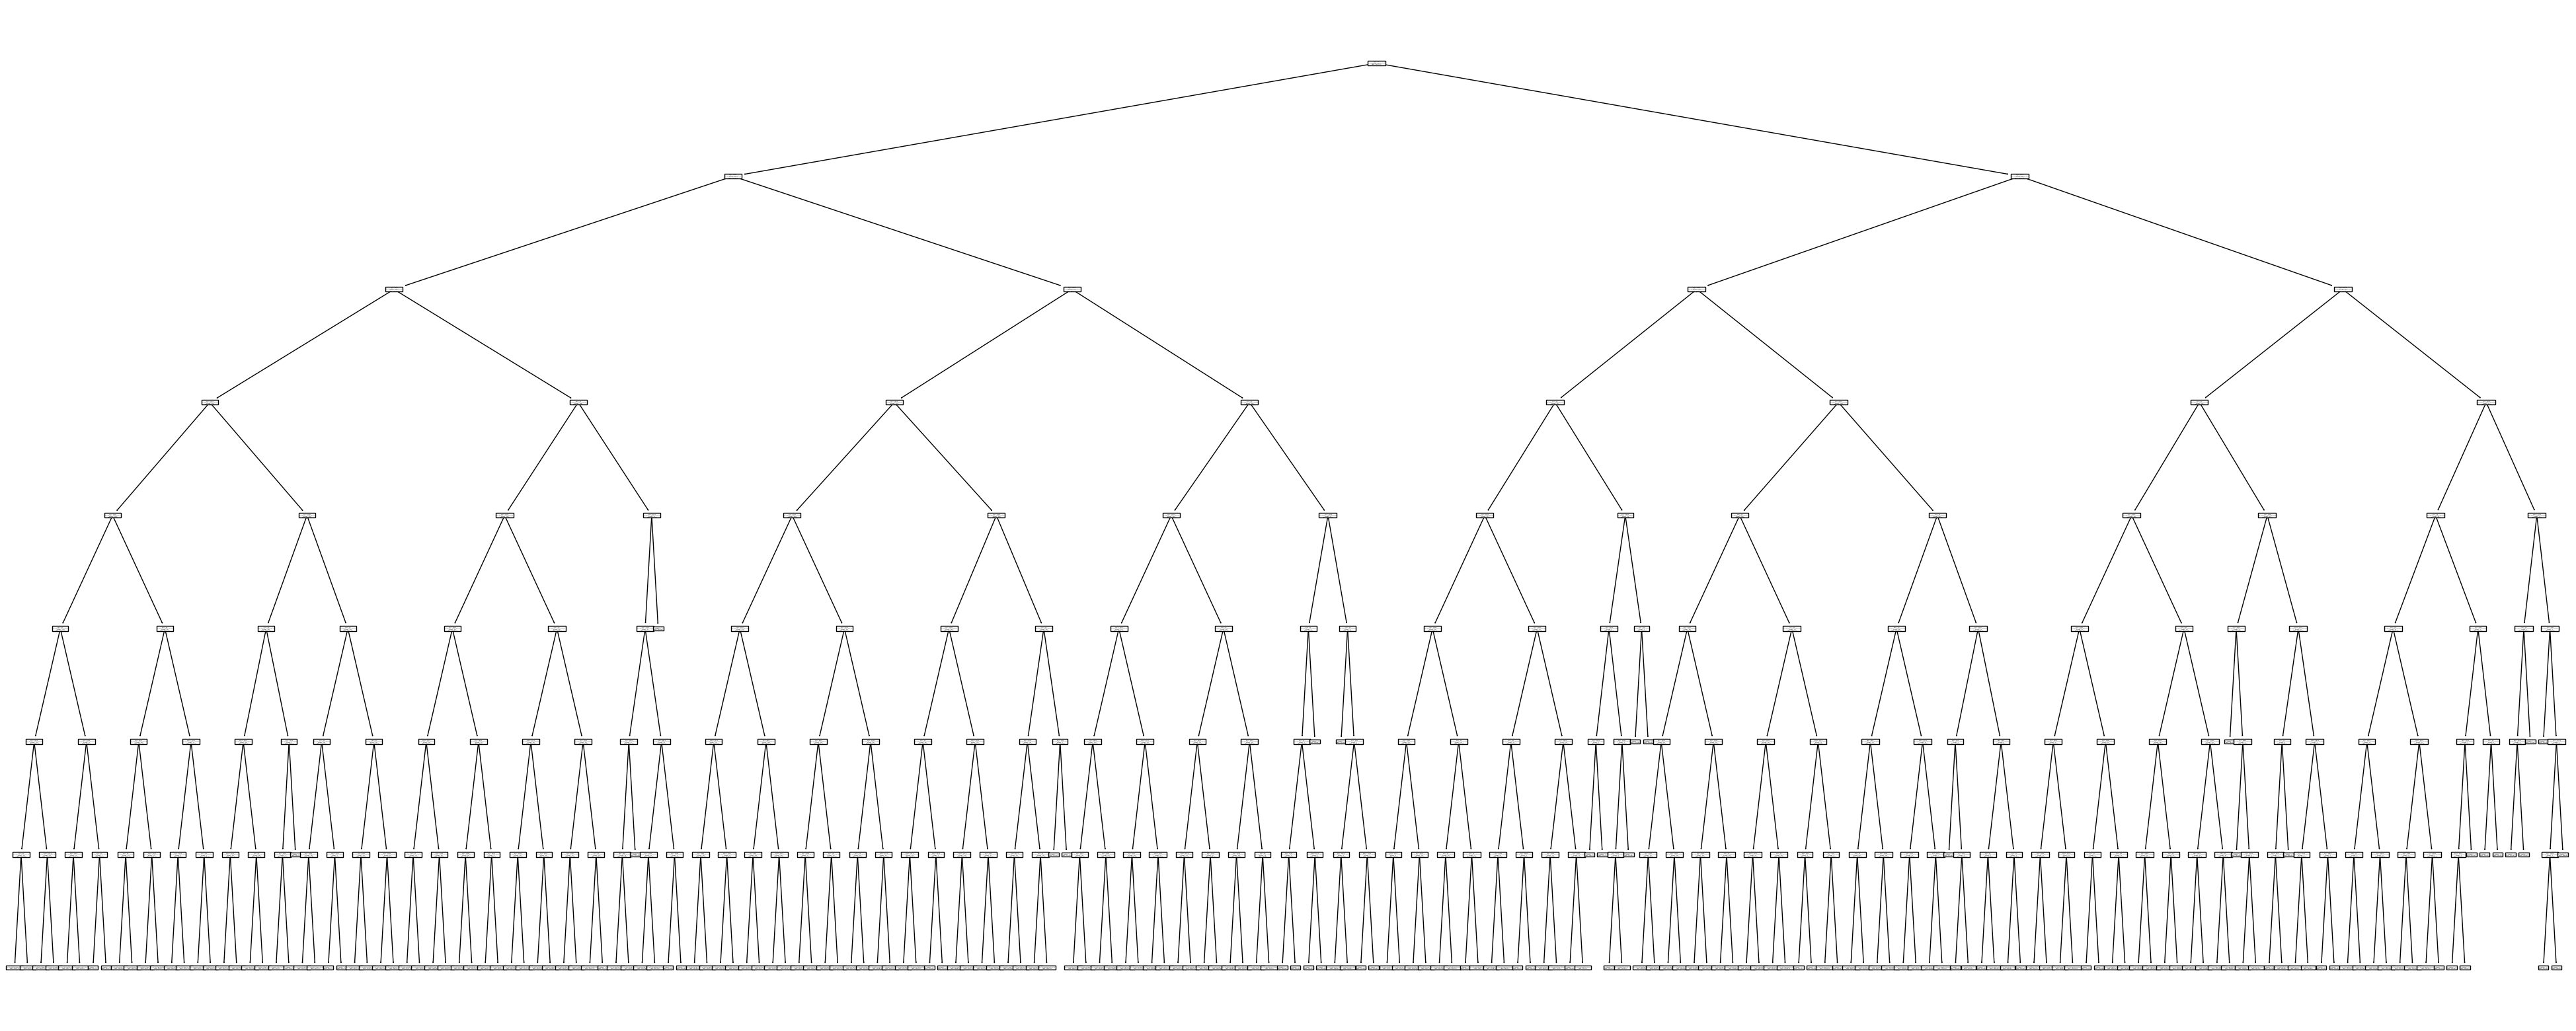

In [26]:
tr_regressor = DecisionTreeRegressor(random_state=0, max_depth=8)
tr_regressor.fit(X_train,y_train)

plt.figure(figsize=(50,20))
plot_tree(tr_regressor)

In [28]:
print("Decision tree Regression Model Score is ", round(tr_regressor.score(X_test,y_test)*100))

Decision tree Regression Model Score is  74


# Random Forest

In [32]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=28, random_state=0)

In [33]:
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))


Random Forest Regression Model Score is  81


# Gradient Boost

In [36]:
class GradientBooster:
    def __init__(self, max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.1, num_iter=50):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0

    def __calculate_loss(self,y, y_pred):
        loss = (1/len(y)) * 0.5 * np.sum(np.square(y-y_pred))
        return loss

    def __take_gradient(self, y, y_pred):
        # grad = -(y-y_pred)
        grad = (y - y_pred)
        return grad

    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(max_depth=self.max_depth,
                                    min_samples_split=self.min_samples_split,
                                    min_samples_leaf=self.min_samples_leaf,
                                    max_features=self.max_features)
        base.fit(X,y)
        return base

    def predict(self,models,y,X):
        pred_0 = np.array([self.y_mean] * len(X))
        pred = pred_0.reshape(len(pred_0),1)

        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X),1)
            # pred -= self.lr * temp
            pred += self.lr * temp

        return pred

    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y))
        pred = pred_0.reshape(len(pred_0),1)
        # print("pred_0", pred_0)

        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            # print("loss: epoch", epoch, "=", loss)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            # print("gradi", grads)
            base = self.__create_base_model(X, grads)
            r = (base.predict(X)).reshape(len(X),1)
            # print("r", r)
            # pred -= self.lr * r
            pred += self.lr * r
            models.append(base)

        return models, losses, pred_0

In [39]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)
#TRAIN
G = GradientBooster()
models, losses, pred_0 = G.train(X_train,y_train)

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'Loss vs Epoch')]

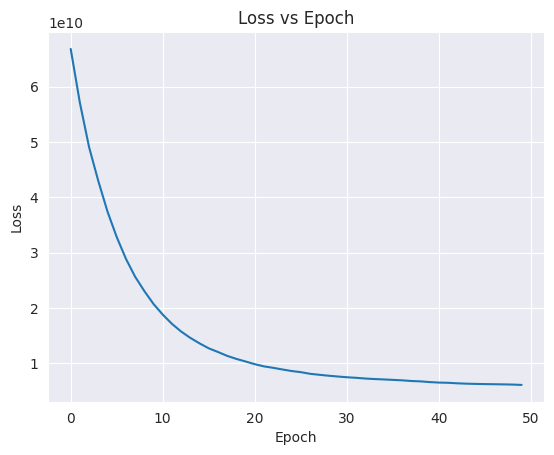

In [40]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(50),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')